Demo to Gega Darakhvelidze

In [ ]:
import pandas as pd
import numpy as np
import heapq
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [32]:
moon = pd.read_csv('moons.csv')
moon_input = moon.to_numpy()

Single Distance

In [ ]:
def hierarchical_clustering_single_pq(X, K):

    n = X.shape[0]
    
    D = squareform(pdist(X))  
    
    clusters = {i: [i] for i in range(n)}
    active_clusters = set(clusters.keys())
    current_cluster_id = n  
    
    heap = []
    for i in range(n):
        for j in range(i+1, n):
            heapq.heappush(heap, (D[i, j], i, j))
    
    while len(active_clusters) > K:
    
        d, i, j = heapq.heappop(heap)
        
        if i not in active_clusters or j not in active_clusters:
            continue
        
        new_cluster = clusters[i] + clusters[j]
        
        active_clusters.remove(i)
        active_clusters.remove(j)
        del clusters[i]
        del clusters[j]
        
        new_id = current_cluster_id
        current_cluster_id += 1
        clusters[new_id] = new_cluster
        active_clusters.add(new_id)
        
        for k in active_clusters:
            if k == new_id:
                continue
            new_dist = np.min(D[np.ix_(new_cluster, clusters[k])])

            if new_id < k:
                heapq.heappush(heap, (new_dist, new_id, k))
            else:
                heapq.heappush(heap, (new_dist, k, new_id))
    
    labels = np.empty(n, dtype=int)
    for label, cluster_id in enumerate(active_clusters):
        for index in clusters[cluster_id]:
            labels[index] = label
    return labels


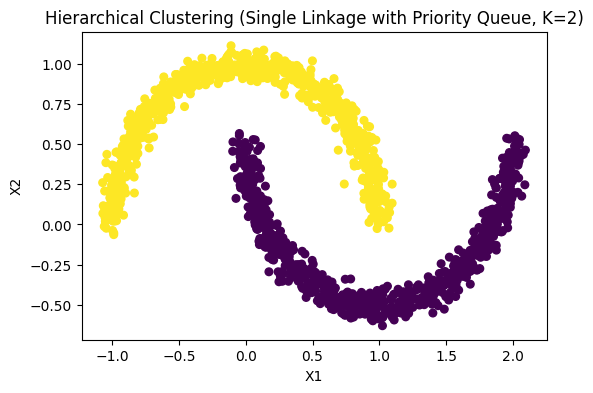

In [ ]:
labels = hierarchical_clustering_single_pq(moon_input, K=2)

plt.figure(figsize=(6, 4))
plt.scatter(moon_input[:, 0], moon_input[:, 1], c=labels, cmap='viridis', s=30)
plt.title("Hierarchical Clustering (Single Linkage with Priority Queue, K=2)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

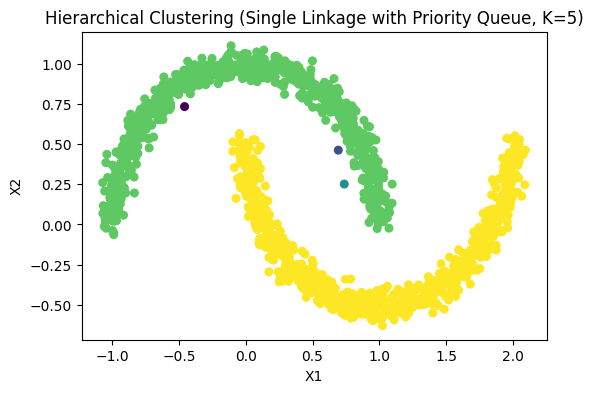

In [ ]:
labels = hierarchical_clustering_single_pq(moon_input, K=5)

plt.figure(figsize=(6, 4))
plt.scatter(moon_input[:, 0], moon_input[:, 1], c=labels, cmap='viridis', s=30)
plt.title("Hierarchical Clustering (Single Linkage with Priority Queue, K=5)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

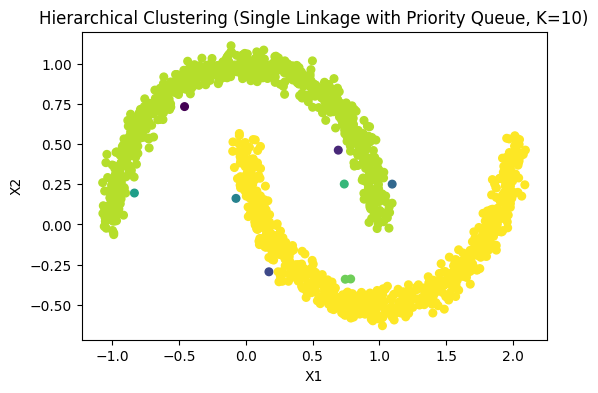

In [ ]:
labels = hierarchical_clustering_single_pq(moon_input, K=10)

plt.figure(figsize=(6, 4))
plt.scatter(moon_input[:, 0], moon_input[:, 1], c=labels, cmap='viridis', s=30)
plt.title("Hierarchical Clustering (Single Linkage with Priority Queue, K=10)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

Average Distance

In [ ]:
def hierarchical_clustering_average_pq(X, K):

    n = X.shape[0]
    D = squareform(pdist(X))  

    clusters = {i: [i] for i in range(n)}
    active_clusters = set(clusters.keys())
    current_cluster_id = n  
    
    heap = []
    for i in range(n):
        for j in range(i+1, n):
            heapq.heappush(heap, (D[i, j], i, j))
    
    while len(active_clusters) > K:
        d, i, j = heapq.heappop(heap)
        
        if i not in active_clusters or j not in active_clusters:
            continue
        
        new_cluster = clusters[i] + clusters[j]
        
        active_clusters.remove(i)
        active_clusters.remove(j)
        del clusters[i]
        del clusters[j]
        
        new_id = current_cluster_id
        current_cluster_id += 1
        clusters[new_id] = new_cluster
        active_clusters.add(new_id)
        
        for k in active_clusters:
            if k == new_id:
                continue
            new_dist = np.mean(D[np.ix_(new_cluster, clusters[k])])
            
            if new_id < k:
                heapq.heappush(heap, (new_dist, new_id, k))
            else:
                heapq.heappush(heap, (new_dist, k, new_id))
    
    labels = np.empty(n, dtype=int)
    for label, cluster_id in enumerate(active_clusters):
        for index in clusters[cluster_id]:
            labels[index] = label
    return labels



K = 2

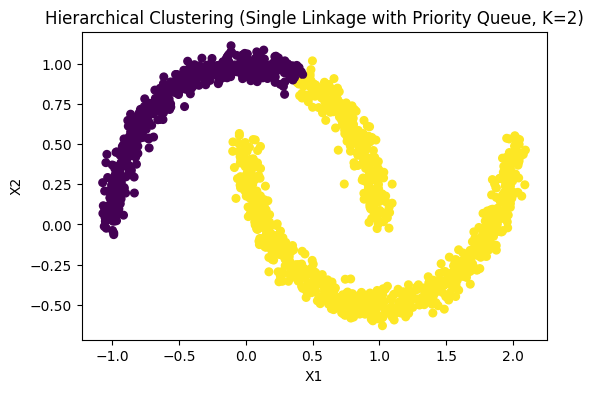

In [ ]:
labels = hierarchical_clustering_average_pq(moon_input, K=2)

plt.figure(figsize=(6, 4))
plt.scatter(moon_input[:, 0], moon_input[:, 1], c=labels, cmap='viridis', s=30)
plt.title("Hierarchical Clustering (Single Linkage with Priority Queue, K=2)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

K=5

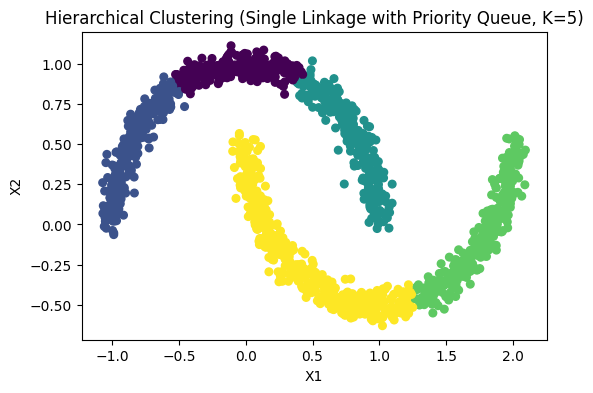

In [ ]:
labels = hierarchical_clustering_average_pq(moon_input, K=5)

plt.figure(figsize=(6, 4))
plt.scatter(moon_input[:, 0], moon_input[:, 1], c=labels, cmap='viridis', s=30)
plt.title("Hierarchical Clustering (Single Linkage with Priority Queue, K=5)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

K = 10

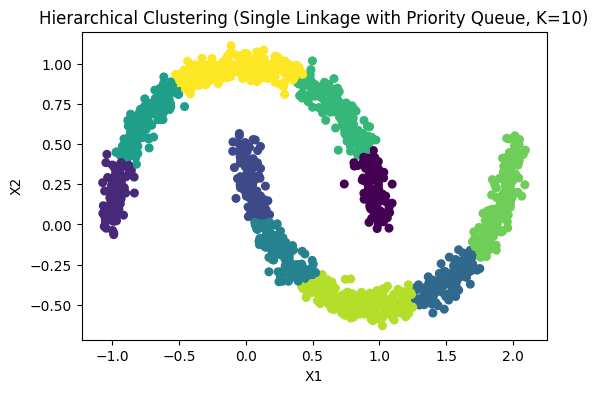

In [ ]:
labels = hierarchical_clustering_average_pq(moon_input, K=10)

plt.figure(figsize=(6, 4))
plt.scatter(moon_input[:, 0], moon_input[:, 1], c=labels, cmap='viridis', s=30)
plt.title("Hierarchical Clustering (Single Linkage with Priority Queue, K=10)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()